# Titanic Survival Model

In [1]:
import numpy as np
import xlsxwriter
import time
import os
import codecs
import pandas as pd
import math as math
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from IPython.display import SVG, HTML

#### Step 1. 利用交互分组（Interactive Grouping）模块，将原始数据做最优化分组处理。

In [2]:
import optimizegrouping as ogp

In [3]:
datafile = '/home/dzn/Kaggle/Titanic/Data/train.csv'

In [4]:
xnames = ['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

In [5]:
target = 'Survived'

In [6]:
result = ogp.optmizeGrouping()

/usr/lib/python2.7/site-packages/pandas-0.19.1-py2.7-linux-x86_64.egg/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python2.7/site-packages/pandas-0.19.1-py2.7-linux-x86_64.egg/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[  0.42   4.    13.82  17.    19.    20.    22.    24.    25.    27.    28.
  30.    31.92  34.    36.    38.    41.    45.    50.    56.  ]
Xname = Age
[4.0, 17.0]
Xname = Pclass
[1.0, 2.0]
Please Check Whether Sex is String type ?
process 'Prebin' will take Sex as String type !!!
Xname = Sex
Xname = SibSp
[0.0, 3.0]
Xname = Parch
[0.0]
[   0.          7.225       7.55        7.75        7.8542      7.90164
    8.05        9.         10.5        13.         14.4542     16.1
   21.720696   26.         27.172992   31.         39.6875     56.4958
   77.9583    113.275   ]
Xname = Fare
[7.2249999999999996, 10.5, 77.958299999999994]


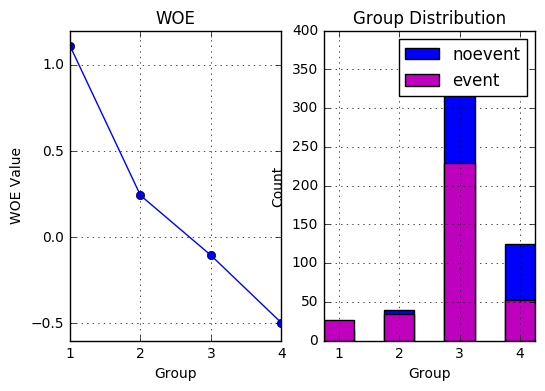

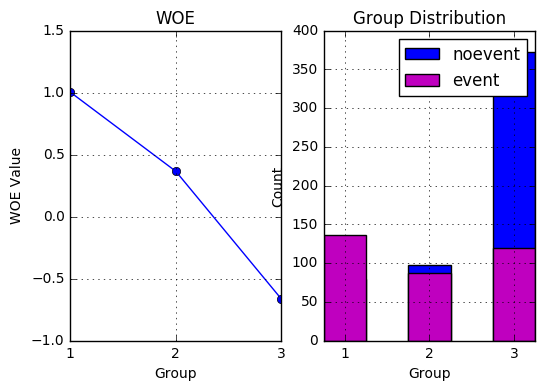

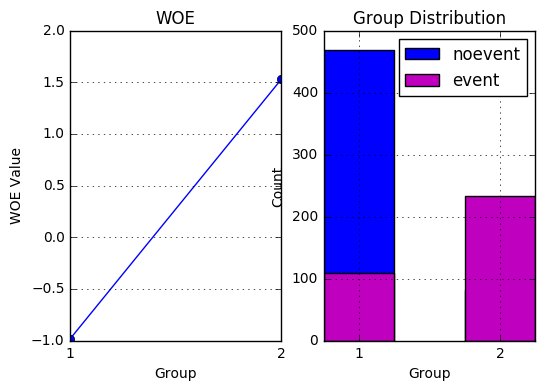

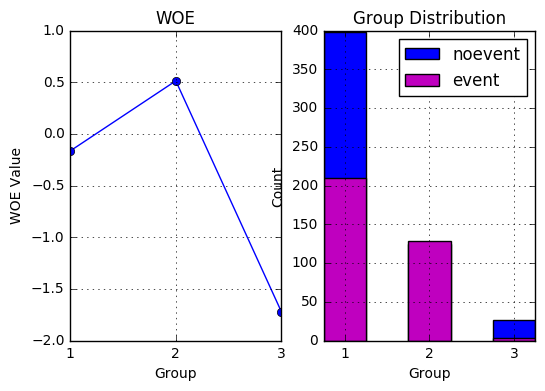

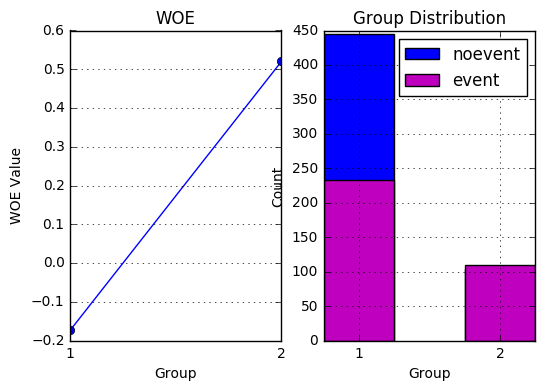

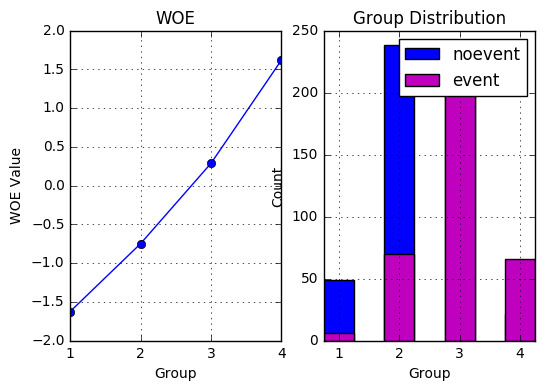

In [7]:
result.optimzegrouping( datafile, xnames, target)

In [8]:
train = pd.read_csv(datafile)

In [9]:
train['Pclass_woe'] = 0.0
train['SibSp_woe'] = 0.0
train['Parch_woe'] = 0.0
train['Fare_woe'] = 0.0
train['Sex_woe'] = 0.0
train['Age_woe'] = 0.0

In [10]:
for i in xrange(train.shape[0]):
    
    if (train['Pclass'].loc[i] <= 1.0 ):
        train['Pclass_woe'].loc[i] = 1.00391595551
    elif ( 1.0 < train['Pclass'].loc[i] <= 2.0):
        train['Pclass_woe'].loc[i] = 0.364484844598
    elif (train['Pclass'].loc[i] > 2.0 ):
        train['Pclass_woe'].loc[i] = -0.666482656715
    else:
        train['Pclass_woe'].loc[i] = 0.0
    
    if (train['SibSp'].loc[i] <= 0.0):
        train['SibSp_woe'].loc[i] = -0.16605677012
    elif (0.0 < train['SibSp'].loc[i] <= 3.0):
        train['SibSp_woe'].loc[i] = 0.512818543204
    elif (train['SibSp'].loc[i] > 3.0):
        train['SibSp_woe'].loc[i] = -1.72393687289
    else:
        train['SibSp_woe'].loc[i] = 0.0
    
    if (train['Parch'].loc[i] <= 0.0) :
        train['Parch_woe'].loc[i] = -0.173748124154
    elif (train['Parch'].loc[i] > 0.0 ):
        train['Parch_woe'].loc[i] = 0.520244687535
    else:
        train['Parch_woe'].loc[i] = 0.0
    
    if (train['Fare'].loc[i] <= 7.225) :
        train['Fare_woe'].loc[i] = -0.173748124154
    elif ( 7.225 < train['Fare'].loc[i] <= 10.5) :
        train['Fare_woe'].loc[i] = -0.750487727175
    elif ( 10.5 < train['Fare'].loc[i] <= 77.9583 ):
        train['Fare_woe'].loc[i] = 0.286808137504
    elif ( train['Fare'].loc[i] > 77.9583):
        train['Fare_woe'].loc[i] = 1.61842000875
    else:
        train['Fare_woe'].loc[i] = 0.0 
    
    if (train['Sex'].loc[i] == 'female') :
        train['Sex_woe'].loc[i] = 1.52987700334
    elif (train['Sex'].loc[i] == 'male'):
        train['Sex_woe'].loc[i] = -0.983832709242
    else :
        train['Sex_woe'].loc[i] = 0.0
        
    if (train['Age'].loc[i] <= 4.0) :
        train['Age_woe'].loc[i] = 1.11074004079
    elif (4.0 < train['Age'].loc[i] <= 17.0):
        train['Age_woe'].loc[i] = 0.242651410738
    elif (train['Age'].loc[i] > 17.0):
        train['Age_woe'].loc[i] = -0.105319318467        
    else :
        train['Age_woe'].loc[i] = -0.497217486469
                

/usr/lib/python2.7/site-packages/pandas-0.19.1-py2.7-linux-x86_64.egg/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
#train.head()

In [11]:
training = train[['Sex_woe', 'Pclass_woe', 'SibSp_woe', 'Parch_woe', 'Fare_woe', 'Age_woe']]

In [12]:
ydata = train['Survived']

In [14]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
from sklearn.cross_validation import cross_val_score

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
cross_val_score(xgbc, training, ydata, cv = 5).mean()

0.80700943014490112

In [19]:
from sklearn.grid_search import GridSearchCV

/usr/lib64/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [12]:
params = {'max_depth' : range(2, 7), 'n_estimators' : range(100, 1100, 200), 'learning_rate': [0.05, 0.1, 0.25, 0.5, 1.0]}

In [13]:
xg_grid = XGBClassifier()

In [14]:
gs = GridSearchCV(xg_grid, params, n_jobs=-1, cv = 5, verbose = 1)

In [ ]:
gs.fit(training, ydata)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


In [17]:
import stepwise

In [22]:
reload(stepwise)

<module 'stepwise' from 'stepwise.py'>

In [23]:
data = train[['Sex_woe', 'Pclass_woe', 'SibSp_woe', 'Parch_woe', 'Fare_woe', 'Age_woe', "Survived"]]

In [24]:
role  = [1,1,1,1,1,1,2]

In [25]:
b = stepwise.yfit(data, role, slentry=0.3, slstay=0.2)

**** The LogitReg Process ****

** Step 0. Intercept entered:

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Mon, 10 Jul 2017   Pseudo R-squ.:                   0.000
Time:                        15:54:56   Log-Likelihood:                -593.33
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4733      0.069     -6.870      0.000      -0.608      -0.338
 
                          Model Fit Statistics 
AIC               

In [26]:
b.auc()

0.85252825445520297

In [28]:
yfit = b.dat

In [29]:
yfit.loc[yfit['y_fit'] > 0.5, 'y_fit'] = 1

In [30]:
yfit.loc[yfit['y_fit'] <= 0.5, 'y_fit'] = 0

In [32]:
yfit.head()

,y,y_fit
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0


In [33]:
from sklearn.metrics import precision_score

In [35]:
precision_score(yfit['y'], yfit['y_fit'])  

0.78245614035087718